In [1]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

Matplotlib is building the font cache; this may take a moment.


In [33]:
model

KAN(
  (biases): ModuleList(
    (0): Linear(in_features=5, out_features=1, bias=False)
    (1): Linear(in_features=1, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)

In [3]:
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [25]:
dataset

{'train_input': tensor([[-0.0075,  0.5547],
         [ 0.5364,  0.1791],
         [-0.8230,  0.1526],
         ...,
         [-0.3216, -0.4567],
         [ 0.0036, -0.3966],
         [-0.1923, -0.8376]]),
 'test_input': tensor([[-0.0850, -0.2418],
         [-0.7799, -0.0967],
         [-0.0061, -0.4609],
         ...,
         [ 0.0392, -0.2945],
         [-0.3037, -0.0922],
         [ 0.7534,  0.8848]]),
 'train_label': tensor([[1.3287],
         [2.7886],
         [0.6038],
         [0.6248],
         [0.5784],
         [2.4956],
         [0.9510],
         [2.2221],
         [0.9604],
         [5.0185],
         [0.7090],
         [0.6934],
         [1.4567],
         [0.4631],
         [0.6223],
         [1.1396],
         [2.6025],
         [3.8784],
         [0.7173],
         [0.5919],
         [5.1320],
         [2.4276],
         [0.5478],
         [2.5004],
         [0.6470],
         [1.3875],
         [2.6785],
         [0.9634],
         [0.4302],
         [0.7583],
      

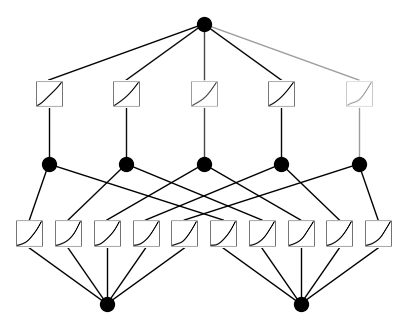

In [5]:
model(dataset['train_input'])
model.plot(beta=100)

In [6]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.21e-01 | test loss: 1.24e-01 | reg: 2.61e+01 : 100%|██| 20/20 [00:04<00:00,  4.39it/s]


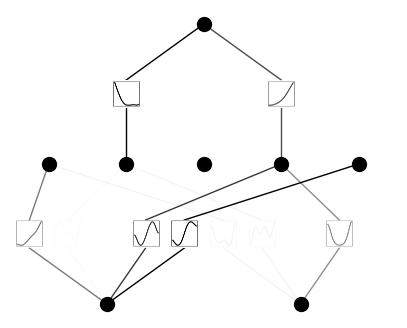

In [7]:
model.plot()

In [19]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)


fixing (0,0,0) with sin, r2=0.9955846071243286
fixing (0,0,1) with abs, r2=0.7288218140602112
fixing (0,0,2) with sin, r2=0.8695026636123657
fixing (0,0,3) with sin, r2=0.9983787536621094
fixing (0,0,4) with sin, r2=0.9969949126243591
fixing (0,1,0) with x^4, r2=0.8991718292236328
fixing (0,1,1) with sin, r2=0.8083731532096863
fixing (0,1,2) with sin, r2=0.8487681746482849
fixing (0,1,3) with x^2, r2=0.9901672601699829
fixing (0,1,4) with sin, r2=0.7657085061073303
fixing (1,0,0) with x^3, r2=0.870327889919281
fixing (1,1,0) with x^3, r2=0.9791205525398254
fixing (1,2,0) with exp, r2=0.10693731904029846
fixing (1,3,0) with tanh, r2=0.9999844431877136
fixing (1,4,0) with tanh, r2=0.9248857498168945


0.02*(-0.08*x_2**4 + sin(0.73*x_1 - 4.04) - 0.62)**3 + 0.01*(-sin(8.07*x_2 - 0.19) - 0.09*Abs(6.13*x_1 - 2.97) + 0.83)**3 + 4.47*tanh(0.81*x_2**2 + 0.74*sin(3.15*x_1) - 1.23) + 0.01*tanh(-13.11*sin(2.65*x_1 - 9.41) + 0.01*sin(7.79*x_2 - 8.79) + 5.95) + 4.72

In [23]:
model.symbolic_formula()[0][0]

0.02*(-0.08*x_2**4 + sin(0.73*x_1 - 4.04) - 0.62)**3 + 0.01*(-sin(8.07*x_2 - 0.19) - 0.09*Abs(6.13*x_1 - 2.97) + 0.83)**3 + 4.47*tanh(0.81*x_2**2 + 0.74*sin(3.15*x_1) - 1.23) + 0.01*tanh(-13.11*sin(2.65*x_1 - 9.41) + 0.01*sin(7.79*x_2 - 8.79) + 5.95) + 4.72